# Most Trending YouTube Videos in Canada

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image, YouTubeVideo, HTML
%matplotlib inline 
import json
import seaborn as sns
import requests
from ipywidgets import Image
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

<img src="https://www.9thco.com/sites/default/files/9thCO_insights_new_images/64_canadianyoutube.png">

##### Data source: https://www.kaggle.com/datasnaek/youtube-new/data

### Research questions to be answered:
1. Trending options:
    - per peoples interests by category, views, dis/likes, comments and tags
    - text analysis of titles of videos vs. common trends / keywords
2. Text Analysis of tags versus comments.

In [41]:
df=pd.read_csv('Data/CAvideos.csv')

In [42]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


####           - We have to convert the file from json to a df because the category id key is only inside the json file


In [6]:
file = 'Data/CA_category_id.json'
with open(file) as train_file:
    data = json.load(train_file)

In [7]:
#naming the datdframe 
df_review = pd.DataFrame()

##### Reviewing the json file
    - inside the json file the IDs are inside of a list called items 
    but the titles are inside of a sublist called title so we have
    to convert it to a list in the data frame to extract the titles


In [8]:
CAT_ID = []
for result in data['items']:
    CAT_ID.append(result['id'])

In [9]:
CAT_Name=[]
for result in data['items']:
    CAT_Name.append(result['snippet']['title'])

In [10]:
df_review['category_id']=CAT_ID

In [11]:
df_review['category_name']=CAT_Name

In [12]:
df_review['category_id']=df_review.category_id.astype(int)

In [13]:
df_review.head()

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [14]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
category_id      31 non-null int32
category_name    31 non-null object
dtypes: int32(1), object(1)
memory usage: 452.0+ bytes


In [43]:
# Next, we have to merge the json data with the df
df=pd.merge(df, df_review, on=['category_id'])

In [44]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15523 entries, 0 to 15522
Data columns (total 17 columns):
video_id                  15523 non-null object
trending_date             15523 non-null object
title                     15523 non-null object
channel_title             15523 non-null object
category_id               15523 non-null int64
publish_time              15523 non-null object
tags                      15523 non-null object
views                     15523 non-null int64
likes                     15523 non-null int64
dislikes                  15523 non-null int64
comment_count             15523 non-null int64
thumbnail_link            15523 non-null object
comments_disabled         15523 non-null bool
ratings_disabled          15523 non-null bool
video_error_or_removed    15523 non-null bool
description               15033 non-null object
category_name             15523 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 1.8+ MB


In [18]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,15523.000000,1.552300e+04,1.552300e+04,1.552300e+04,15523.000000
mean,20.745925,1.128207e+06,4.098747e+04,2.442997e+03,5347.292340
std,6.778177,3.671824e+06,1.309721e+05,2.879781e+04,22115.642785
min,1.000000,1.141000e+03,0.000000e+00,0.000000e+00,0.000000
25%,20.000000,1.422430e+05,2.098000e+03,1.010000e+02,415.000000
50%,24.000000,3.559010e+05,9.066000e+03,2.950000e+02,1342.000000
75%,24.000000,9.515185e+05,2.947200e+04,9.785000e+02,3924.000000
max,43.000000,1.378431e+08,3.014479e+06,1.602383e+06,827755.000000


## Interpreting the Data : most viewed by category

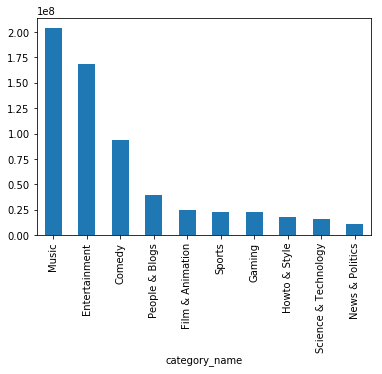

In [38]:
df.groupby('category_name').likes.sum().nlargest(10).plot('bar')

### most liked video (in category)

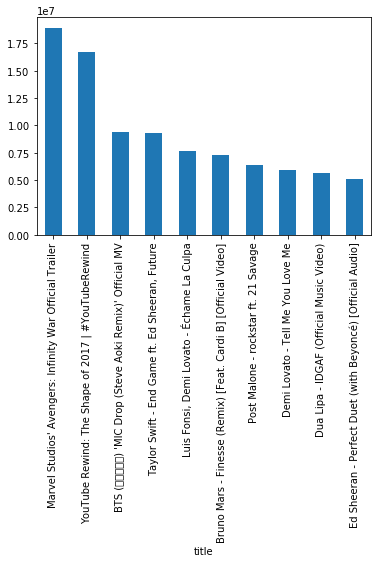

In [20]:
# most viewed by video title
df.groupby('title').likes.sum().nlargest(10).plot('bar')

### most disliked video (in categories)

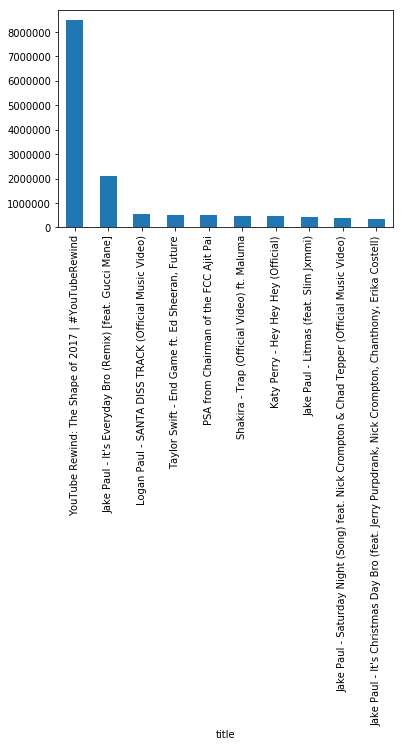

In [21]:
df.groupby('title').dislikes.sum().nlargest(10).plot('bar')

### videos with the most comments (in categories)

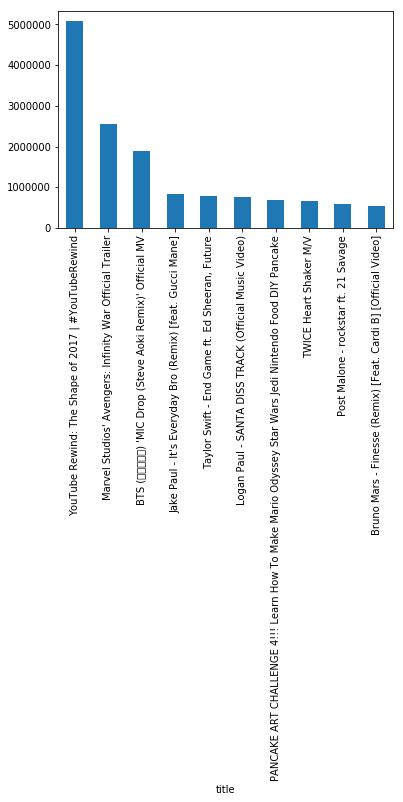

In [22]:
df.groupby('title').comment_count.sum().nlargest(10).plot('bar')

In [23]:
df.groupby('channel_title').likes.sum().nlargest(10)

channel_title
Marvel Entertainment    19631957
YouTube Spotlight       16713032
PewDiePie               15064025
Ed Sheeran              13302039
EminemVEVO              11804326
Dude Perfect            11689397
Logan Paul Vlogs        11229569
ibighit                 10163340
TaylorSwiftVEVO          9397847
LuisFonsiVEVO            7925571
Name: likes, dtype: int64

### Putting this all together

In [24]:
df['date']=pd.to_datetime(df.publish_time)

In [25]:
df['year']=df.date.dt.year

In [26]:
df['month']=df.date.dt.month

In [27]:
df.groupby(['year', 'month'])['views','likes','dislikes','comment_count'].sum()

views      likes  dislikes  comment_count
year month                                                
2008 1          990040       2834        99            535
     2          802735       5957       374            829
2009 2          264577        487         5             48
2010 1         1997620      14066      2050            932
2012 12           4057          3         1              6
2013 3          114933        511        18             25
     5         1166437       6374       297            530
     7         2425211      12149       166           1121
     11         280211       1639        33            116
2014 1          552665       3108        99            343
     2          261544        471        34             40
     9          107331        206         5              8
     11           7889        220         0              3
     12         787752       1488       135             62
2015 4          103148        351        13             27
     9          152397        452        20             42
     10         133924       3251        47            441
     12          24576         93         4              7
2016 3          409514        405        37            224
     9          317040       1778        48            162
     10         158564        724        16             98
     11         362002       2368       103            107
     12          16921        187         0              5
2017 4          766826      24408       562           1535
     5          944521       6819       139            323
     8         1246732      15566       558           1356
     9         7466832     194857      3432           7889
     10          30758          4         5              7
     11     4789458215  173205722   8256920       21853135
     12     7390739009  270927528  20848455       35734087
2018 1      5311069087  191814471   8808961       25401976

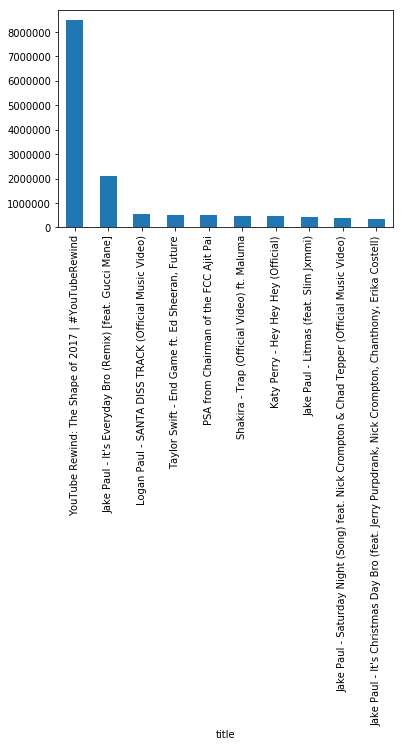

In [28]:
df.groupby('title').dislikes.sum().nlargest(10).plot('bar')

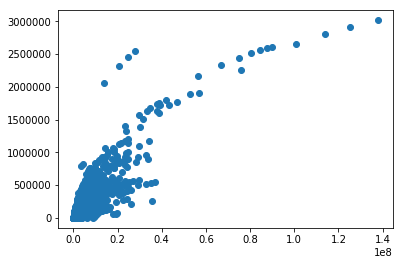

In [29]:
plt.scatter(df.views, df.likes)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,year,month
category_id,1.000000,-0.115277,-0.125639,-0.011265,-0.048675,0.024767,0.015364,0.005273,0.003545,0.006861
views,-0.115277,1.000000,0.877770,0.646967,0.790904,-0.011011,-0.012713,-0.001973,-0.029262,0.037255
likes,-0.125639,0.877770,1.000000,0.508076,0.824501,-0.022246,-0.026559,0.001687,-0.029272,0.039519
dislikes,-0.011265,0.646967,0.508076,1.000000,0.769564,-0.004988,-0.007200,-0.000946,-0.018791,0.024249
comment_count,-0.048675,0.790904,0.824501,0.769564,1.000000,-0.027764,-0.016485,-0.000396,-0.020537,0.028640
comments_disabled,0.024767,-0.011011,-0.022246,-0.004988,-0.027764,1.000000,0.104942,-0.002439,0.017803,-0.018247
ratings_disabled,0.015364,-0.012713,-0.026559,-0.007200,-0.016485,0.104942,1.000000,-0.001803,-0.011344,0.015133
video_error_or_removed,0.005273,-0.001973,0.001687,-0.000946,-0.000396,-0.002439,-0.001803,1.000000,0.019824,-0.021557
year,0.003545,-0.029262,-0.029272,-0.018791,-0.020537,0.017803,-0.011344,0.019824,1.000000,-0.870895
month,0.006861,0.037255,0.039519,0.024249,0.028640,-0.018247,0.015133,-0.021557,-0.870895,1.000000


In [46]:
df['music']=df.category_name.apply(lambda x: 1 if x == 'Music' else 0)

In [47]:
df['entertainment']=df.category_name.apply(lambda x: 1 if x == 'Entertainment' else 0)

In [51]:
df['TaylorSwiftVEVO']=df.channel_title.apply(lambda x: 1 if x == 'TaylorSwiftVEVO' else 0)
          

In [52]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,music,entertainment,TaylorSwiftVEVO
category_id,1.000000,-0.115277,-0.125639,-0.011265,-0.048675,0.024767,0.015364,0.005273,-0.504634,0.326842,-0.033675
views,-0.115277,1.000000,0.877770,0.646967,0.790904,-0.011011,-0.012713,-0.001973,0.202488,-0.004575,0.144970
likes,-0.125639,0.877770,1.000000,0.508076,0.824501,-0.022246,-0.026559,0.001687,0.247779,-0.034909,0.211086
dislikes,-0.011265,0.646967,0.508076,1.000000,0.769564,-0.004988,-0.007200,-0.000946,0.038722,0.015882,0.050458
comment_count,-0.048675,0.790904,0.824501,0.769564,1.000000,-0.027764,-0.016485,-0.000396,0.104952,0.000045,0.104471
comments_disabled,0.024767,-0.011011,-0.022246,-0.004988,-0.027764,1.000000,0.104942,-0.002439,-0.003112,-0.010963,-0.002439
ratings_disabled,0.015364,-0.012713,-0.026559,-0.007200,-0.016485,0.104942,1.000000,-0.001803,-0.003204,0.004680,-0.001803
video_error_or_removed,0.005273,-0.001973,0.001687,-0.000946,-0.000396,-0.002439,-0.001803,1.000000,-0.006761,0.005108,-0.000451
music,-0.504634,0.202488,0.247779,0.038722,0.104952,-0.003112,-0.003204,-0.006761,1.000000,-0.216691,0.066731
entertainment,0.326842,-0.004575,-0.034909,0.015882,0.000045,-0.010963,0.004680,0.005108,-0.216691,1.000000,-0.014460


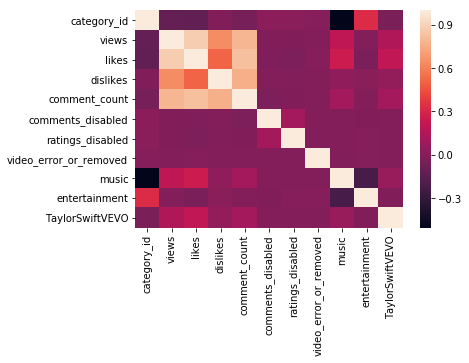

In [53]:
sns.heatmap(df.corr())

# Text Analysis of Data

## Key Findings:
####       1. Music & Entertainment are the most popular viewed videos on YouTubeCA
####       2. The video "The Shape of You" was the most liked, disliked and 
#### comments counted were all the same. This goes to show publicity
#### whether good or bad is still good for business.
####       3. Also, we can see that as time progressed YouTube has become a 
#### trusted SEO for especially Music & Entertainment videos.

 ### Next Steps:
 ####    1. Compare YouTube Canada to USA views for 2017
 ####    2. Collect data after one year for 2017
####     3. After 5 years review the data again to see if lesser searched  
#### categories increases based of of world views and interests.